In [1]:
from IPython.display import display
import ipywidgets as widgets
import time
import pandas as pd
import matplotlib.pyplot as plt


orgindf = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
testerdf = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

del orgindf["Ticket"], orgindf["PassengerId"], orgindf["Parch"], orgindf["SibSp"], orgindf["Fare"], orgindf["Cabin"], \
    orgindf["Embarked"], orgindf["Pclass"]


def alive_filter(life_status, df):
    if str(life_status) == "alive":
        df = df[df['Survived'] == 1]
        return df
    elif str(life_status) == "dead":
        df = df[df['Survived'] == 0]
        return df
    else:
        print("bad value")


def age_filter(age_range, df):
    df = df[(df['Age'].isin(age_range))]
    return df


def gender_filter(gender, df):
    if str(gender) == "male":
        df = df[df['Sex'] == "male"]
        print(df)
        return df
    elif str(gender) == "female":
        df = df[df['Sex'] == "female"]
        return df
    else:
        print("bad value")
        
a = widgets.Checkbox(
    value=False,
    description='Mortality Filter',
    disabled=False,
    indent=False
)
b = widgets.Checkbox(
    value=False,
    description='Age Filter',
    disabled=False,
    indent=False
)
c = widgets.Checkbox(
    value=False,
    description='Gender Filter',
    disabled=False,
    indent=False
)
display(a)
display(b)
display(c)
input("type anything to continue after checking the right boxes: ")

Checkbox(value=False, description='Mortality Filter', indent=False)

Checkbox(value=False, description='Age Filter', indent=False)

Checkbox(value=False, description='Gender Filter', indent=False)

type anything to continue after checking the right boxes: 


''

In [2]:
if a.value == True:
    orgindf = alive_filter(input("alive or dead: "), orgindf)

if b.value == True:
    minage = input("min age: ")
    maxage = input("max age: ")
    orgindf = age_filter(range(int(minage),(int(maxage)+1)), orgindf)

if c.value == True:
    orgindf = gender_filter(str(input("what gender: ")), orgindf)

In [3]:
print(orgindf)

     Survived                                               Name     Sex   Age
0           0                            Braund, Mr. Owen Harris    male  22.0
1           1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2           1                             Heikkinen, Miss. Laina  female  26.0
3           1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4           0                           Allen, Mr. William Henry    male  35.0
..        ...                                                ...     ...   ...
886         0                              Montvila, Rev. Juozas    male  27.0
887         1                       Graham, Miss. Margaret Edith  female  19.0
888         0           Johnston, Miss. Catherine Helen "Carrie"  female   NaN
889         1                              Behr, Mr. Karl Howell    male  26.0
890         0                                Dooley, Mr. Patrick    male  32.0

[891 rows x 4 columns]


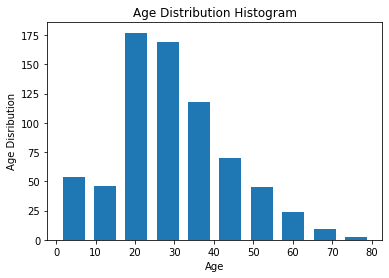

In [4]:
plt.hist(orgindf.Age, rwidth=0.7)
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

In [8]:
piedf = orgindf.groupby(['Sex']).mean()[['Survived']]
display(piedf)

,Survived
Sex,
female,0.742038
male,0.188908


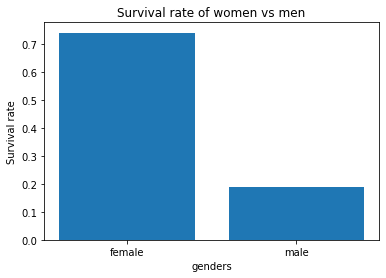

In [25]:
#MAKE THIS FAILSAFE
data = {'female': piedf.Survived[0], 'male': piedf.Survived[1]}
courses = list(data.keys())
values = list(data.values())
   
# creating the bar plot
plt.bar(courses, values)
 
plt.xlabel("genders")
plt.ylabel("Survival rate")
plt.title("Survival rate of women vs men")
plt.show()